<a href="https://colab.research.google.com/github/neuropoly/single_voxel_mrs_b0_shimming/blob/main/SVS_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVS processing - interactive notebook

This notebook demos the process of fitting a single voxel MRS data using FSL MRS.

## Contents:

1. [Install dependencies](#1.-Install-dependencies)
2. [Import required libraries](#2.-Import-required-libraries)
3. [Download the data](#3.-Download-the-data)
4. [B0 Fieldmaps comparison](#4.-B0-Fieldmaps-comparison)
5. [MRS analysis](#5.-MRS-analysis)
7. [Display the whole results](#6.-Display-the-whole-results)

## 1. Install dependencies

In [1]:

# !git clone --recurse-submodules https://git.fmrib.ox.ac.uk/fsl/fsl_mrs.git
# %cd /content/fsl_mrs
# !pip install .

!git clone https://github.com/shimming-toolbox/shimming-toolbox.git
%cd /content/shimming-toolbox/
!pip install .

Cloning into 'shimming-toolbox'...
remote: Enumerating objects: 4055, done.
remote: Counting objects: 100% (1718/1718), done.
remote: Compressing objects: 100% (701/701), done.
remote: Total 4055 (delta 1314), reused 1278 (delta 1002), pack-reused 2337
Receiving objects: 100% (4055/4055), 1.31 MiB | 4.45 MiB/s, done.
Resolving deltas: 100% (2760/2760), done.
/content/shimming-toolbox
Processing /content/shimming-toolbox
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 876.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.3/284.3 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 508.2/508.2 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.1/234.1 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

## 2. Import required libraries

In [ ]:
import fsl_mrs.utils.mrs_io as mrs_io
from fsl_mrs.utils.preproc import nifti_mrs_proc as proc
import fsl_mrs as mrs
from fsl_mrs.utils import report
import datetime
from fsl_mrs.utils import fitting, misc, plotting
import matplotlib.pyplot as plt


#Don't forget to run with a new kernel every time
# ! pip install jupyter_compare_view

import pathlib
import json
import nibabel as nib
import shutil
import numpy as np
from matplotlib.widgets import Slider
import matplotlib.pyplot as plt
import nibabel as nib
import seaborn as sns
# from jupyter_compare_view import compare

try:
    import nilearn
    import seaborn as sns
except ImportError:
    # if not, install it using pip
    !pip install seaborn
    !pip install nilearn

from nilearn.plotting import plot_epi
import seaborn as sns
# !pip install plotly
print('Necessary libraries imported')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 51.7 MB/s eta 0:00:00
Necessary libraries imported


## 3. Download the data

### Download the data from OSF repository


Mounted at /content/drive


### View the contents of the current directory

In [ ]:
data_path = "/content/drive/MyDrive/B0_mapping_data/"

contents = os.listdir(data_path)
# print(f"The contents within the current working directory are: \n{contents}")

os.chdir(data_path)
!pwd


/content/drive/MyDrive/B0_mapping_data


### Change to the desired directory

In [ ]:

# name_exp= input("Change working directory to the subject path: ")
# Current_dir = os.getcwd()
# source_dir=Current_dir+name_exp
# os.chdir(source_dir)
# print("current dir"+source_dir)

### Load the data

In [ ]:
# fieldmap_siemens = nib.load(os.path.join(path, ".nii.gz")).get_fdata()
# fieldmap_grad = nib.load(os.path.join(path, ".nii.gz")).get_fdata()
# fieldmap_lsq = nib.load(os.path.join(path, ".nii.gz")).get_fdata()
# fieldmap_quad = nib.load(os.path.join(path, ".nii.gz")).get_fdata()
# fieldmap_pi = nib.load(os.path.join(path, ".nii.gz")).get_fdata()
# mask = nib.load(os.path.join(path, ".nii.gz")).get_fdata()


Siemens_shimmed = mrs_io.read_FID('siemens_20240212.115418.nii.gz')
# LSQ_shimmed = mrs_io.read_FID('lsq.20240212.115708.nii.gz')
# Grad_shimmed = mrs_io.read_FID('grad.20240212.115708.nii.gz')
# Pi_shimmed = mrs_io.read_FID('pi.20240212.115708.nii.gz')
# Quad_shimmed = mrs_io.read_FID('quad.20240212.115708.nii.gz')



## 4. B0 Fieldmaps comparison

In [ ]:
import analyse_fieldmap
fmaps=[fieldmap_siemens, fieldmap_grad, fieldmap_lsq, fieldmap_quad, fieldmap_pi]
labels=["Siemens shim (acquired)", "Grad shim (sim)", "Lsq shim (sim)", "Quad shim (sim)", "Pi shim (sim)" ]
output = "."
source_dir = os.getcwd()

analyse_fieldmap.plot(source_dir, labels, fmaps, output , mask)

SyntaxError: invalid syntax (<ipython-input-53-b001c9e62dbb>, line 2)

## 5. MRS analysis

###  5.1. Water peak removal

In [ ]:

limits = [-0.6,4]
limunits = 'ppm'

supp_data = proc.remove_peaks(Siemens_shimmed, limits, limit_units=limunits, figure=True)



### 5.2. Phasing

In [ ]:
final_data = proc.phase_correct(supp_data, (2.9, 3.1), figure=True)

### 5.3. Fitting

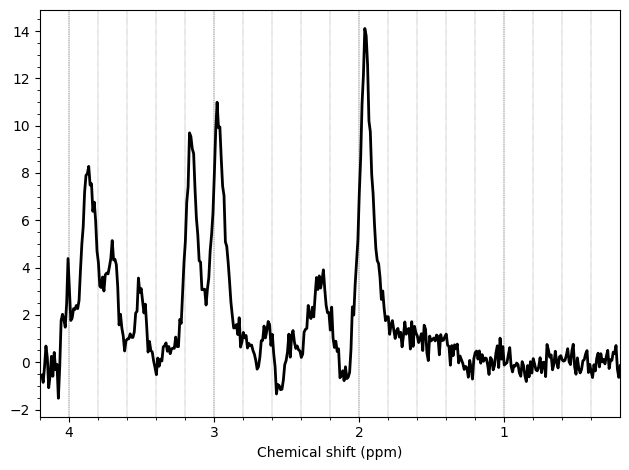

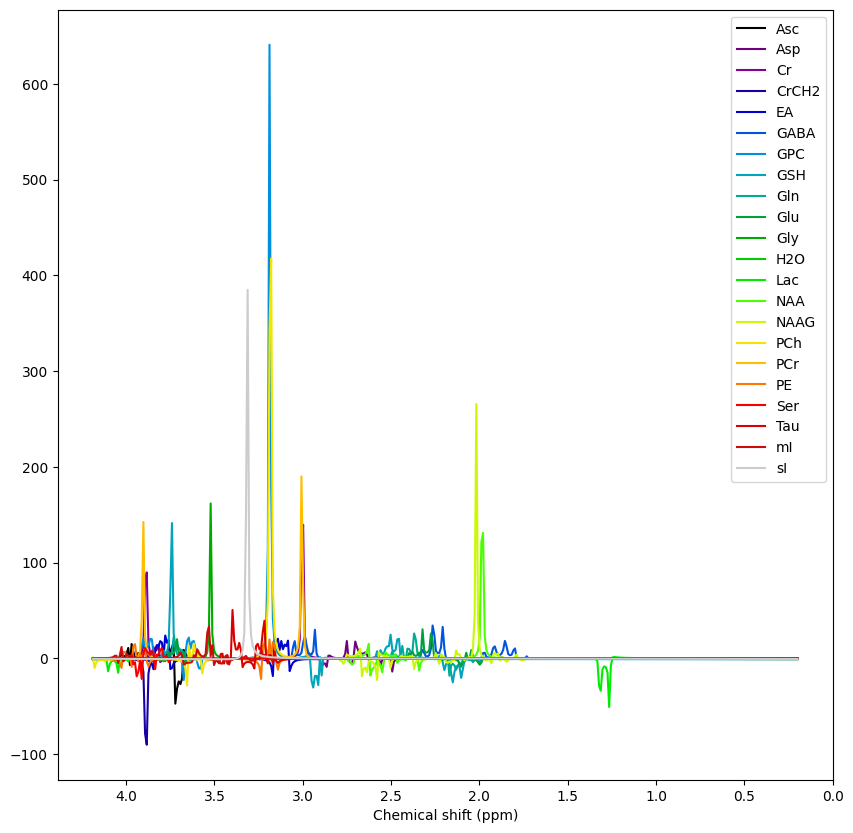

In [ ]:

# Create main MRS Object
mrs = final_data.mrs(basis_file= 'LCModel_Siemens_UnEdited_PRESS_135_ALL.BASIS',
                     )
mrs.processForFitting()

# Quick plots of the Metab and Water spectra
mrs.plot()
plt.show()
plt.figure(figsize=(10,10))
mrs.plot_basis()
plt.show()

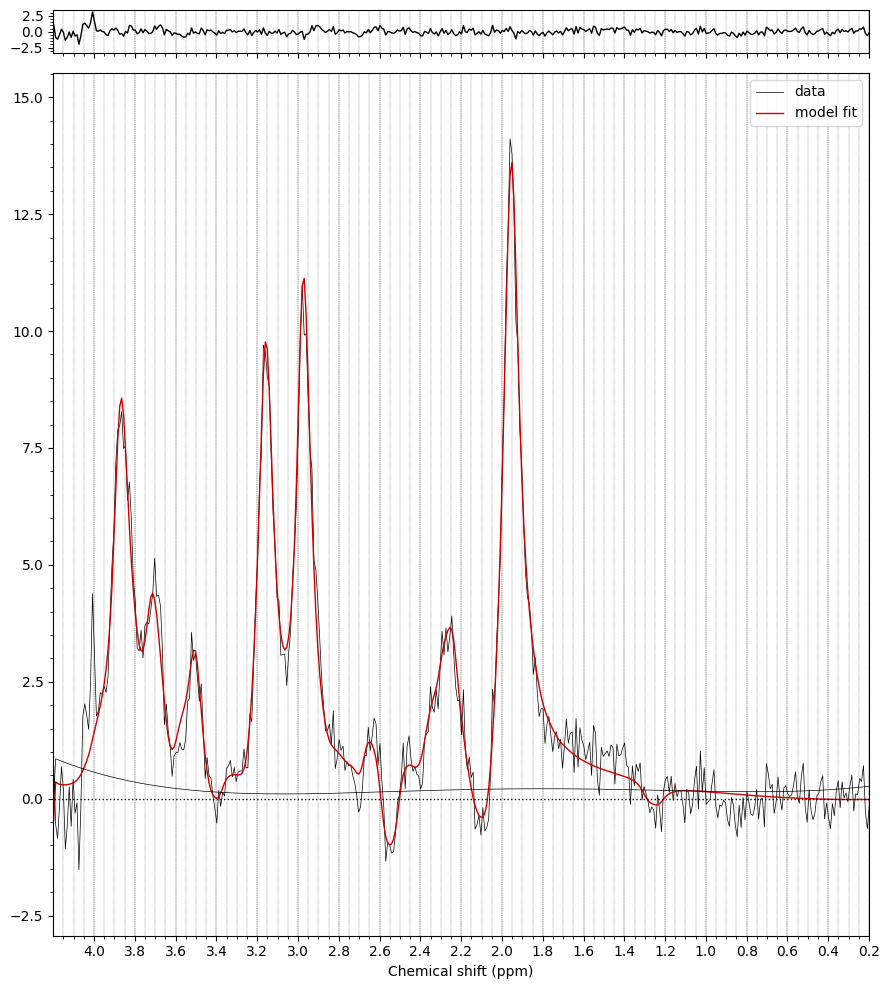

In [ ]:

# Separate macromolecule from the rest (it will have its own lineshape parameters)
metab_groups = misc.parse_metab_groups(mrs,'combine_all')

# Fit with Newton algorithm
Fitargs = {'ppmlim':[0.2,4.2],
           'method':'Newton','baseline_order':4,
           'metab_groups':metab_groups,
           'model':'voigt'}

res = fitting.fit_FSLModel(mrs,**Fitargs)

# Quick sanity-plot of the fit (see further down for interactive plotting)
_ = plotting.plot_fit(mrs, res)

### 5.4. Display

In [ ]:
output = '.'

report.create_svs_report(
    mrs,
    res,
    filename=os.path.join(output,'report_notebook.html'),
    fidfile= 'None',
    basisfile='LCModel_Siemens_UnEdited_PRESS_135_ALL.BASIS',
    h2ofile='None',
    date=datetime.datetime.now().strftime("%Y-%m-%d %H:%M"))


# generate a URL
url = os.path.join(os.getcwd(),'report_notebook.html')
HTML(filename=url)

/content/fsl_mrs/fsl_mrs/utils/plotting.py:790: RuntimeWarning:

divide by zero encountered in divide

/content/fsl_mrs/fsl_mrs/utils/plotting.py:790: RuntimeWarning:

divide by zero encountered in divide

/content/fsl_mrs/fsl_mrs/utils/plotting.py:790: RuntimeWarning:

divide by zero encountered in divide

/content/fsl_mrs/fsl_mrs/utils/plotting.py:790: RuntimeWarning:

divide by zero encountered in divide

/content/fsl_mrs/fsl_mrs/utils/plotting.py:790: RuntimeWarning:

divide by zero encountered in divide

/content/fsl_mrs/fsl_mrs/utils/plotting.py:790: RuntimeWarning:

divide by zero encountered in divide

/content/fsl_mrs/fsl_mrs/utils/plotting.py:790: RuntimeWarning:

divide by zero encountered in divide



## 6. Display the whole results